## Import dependencies

In [245]:
library(spdep)
library(rgdal)
library(maptools)
library(sp)
library(RColorBrewer)
library(classInt)
library(GISTools)
library(maps)
library(spgwr)
library(factoextra)
library(NbClust)
library(repr)
library(stargazer)
options(warn = -1)

In this part of the study we apply Geographically Weighted Regression (GWR) method based on Mueller et al. (2013). This research uses clusterization methods.

Contrary to the previous models, we will not use data for 1 km2 grids, but only for inpost points. Thus, our points on the map will be all inpost machines for Warszawa and Kraków. For the variables for given points, we decided to create 500 meters buffers around a given point, for which: we count the operator's points and points of interest within this range, and we also collected data for grids (if more than one grid coincided with the buffer, then we took the average for grid data). As the target variable, we chose the number of inpost parcel machines around each Inpost point.

## Analysis for Warszawa

In [210]:
df_points_Warszawa<-readOGR(".", "df_warszawa")

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Michal_schudnij\Desktop\Spatial_eco\repo\codes", layer: "df_warszawa"
with 938 features
It has 49 fields
Integer64 fields read as strings:  inpost_poi 


In [211]:
crds<-coordinates(df_points_Warszawa)

In [212]:
names(df_points_Warszawa)[3] <- 'inpost'
names(df_points_Warszawa)[4] <- 'poczta'
names(df_points_Warszawa)[5] <- 'dhl'
names(df_points_Warszawa)[6] <- 'ruch'
names(df_points_Warszawa)[7] <- 'dpd'
names(df_points_Warszawa)[8] <- 'ups'
names(df_points_Warszawa)[22] <- 'fem_ratio'
names(df_points_Warszawa)[36] <- 'tot_log'
names(df_points_Warszawa)[44] <- 'male_65_log'

In [213]:
df_Warszawa <- as.data.frame(df_points_Warszawa)
df_Warszawa$inpost <- as.numeric(df_Warszawa$inpost)

### Basic plot for all Inpost points in Warszawa

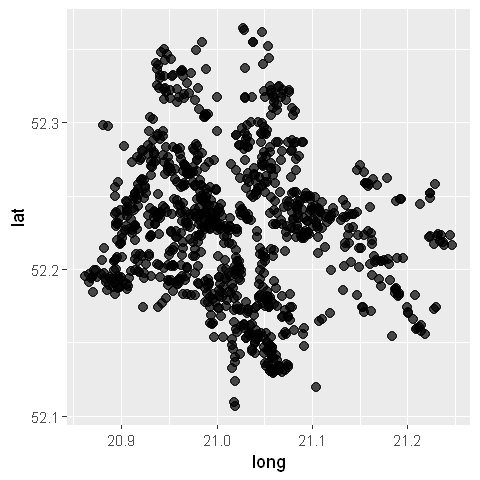

In [214]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot() + geom_point(data=df_Warszawa, aes(long, lat), size = 2.5, alpha = 0.7)

### Model equation for GWR

We do not include variables with too high correlation. According to non spatial explanatory analysis we remove most of the demographic variables.

In [215]:
# equation
eq <- inpost ~ poczta + dhl + dpd + ruch + ups + 
            buildings + parks + forests + schools + railways + cycleways + parkings + crossings + 
            tot_log + male_65_log + fem_ratio

### Selection of optimum bandwith
Commented out due to the time of execution. 

In [155]:
# optimum bandwidth
# bw <- ggwr.sel(eq, data=df_Warszawa, coords=crds, family=poisson(), longlat=TRUE)

Bandwidth: 14.89077 CV score: 10297.78 
Bandwidth: 24.06972 CV score: 10387.11 
Bandwidth: 9.217872 CV score: 10110.47 
Bandwidth: 5.711825 CV score: 9772.493 
Bandwidth: 3.544969 CV score: 9274.785 
Bandwidth: 2.205778 CV score: 8763.745 
Bandwidth: 1.378112 CV score: 18911.88 
Bandwidth: 2.717303 CV score: 8921.138 
Bandwidth: 1.889638 CV score: 8939.769 
Bandwidth: 2.314246 CV score: 8775.789 
Bandwidth: 2.146219 CV score: 8767.203 
Bandwidth: 2.204847 CV score: 8763.735 
Bandwidth: 2.201018 CV score: 8763.717 
Bandwidth: 2.20067 CV score: 8763.717 
Bandwidth: 2.200711 CV score: 8763.717 
Bandwidth: 2.200629 CV score: 8763.717 
Bandwidth: 2.20067 CV score: 8763.717 


In [218]:
bw_Warszawa = 2.20067014501355

### GWR model

In [219]:
# GWR model
model.ggwr_Warszawa<-ggwr(eq, data=df_Warszawa, coords=crds, family=poisson(), longlat=TRUE, bandwidth=bw_Warszawa)
model.ggwr_Warszawa

Call:
ggwr(formula = eq, data = df_Warszawa, coords = crds, bandwidth = bw_Warszawa, 
    family = poisson(), longlat = TRUE)
Kernel function: gwr.Gauss 
Fixed bandwidth: 2.20067 
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept. -5.40384081  0.58759871  1.03740602  1.95221534  5.67025383
poczta       -0.15594598 -0.02042205 -0.01377449  0.00056021  0.32837003
dhl          -0.30763314 -0.00277764  0.01993089  0.02888271  0.27561320
dpd          -0.18407471 -0.00988317  0.00461828  0.03625983  0.22978494
ruch         -0.21374910 -0.01714193  0.03190855  0.05855257  0.13106994
ups          -0.21635700 -0.01479274  0.01435957  0.08409953  0.65641568
buildings    -0.00765355 -0.00032297  0.00022073  0.00078364  0.02662756
parks        -0.66805712 -0.03123343 -0.01582486 -0.00159138  0.18623359
forests      -0.10656564 -0.00409090 -0.00073454  0.00372430  0.02922877
schools      -0.19026278 -0.00053690 

In [220]:
features <- c('poczta', 'dhl', 'dpd', 'ruch', 'ups', 'buildings', 'parks', 
    'forests', 'schools', 'railways', 'cycleways', 'parkings', 'crossings', 
    'tot_log', 'male_65_log', 'fem_ratio')

### Visualisation of GWR output for Warszawa

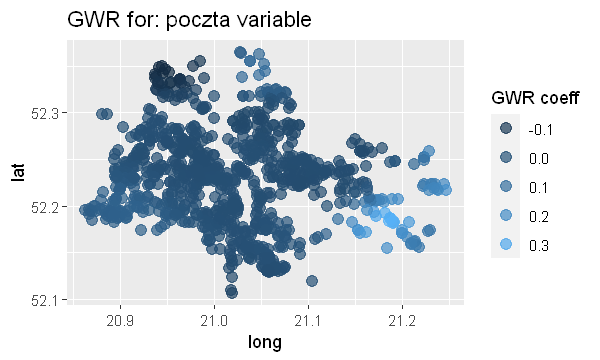

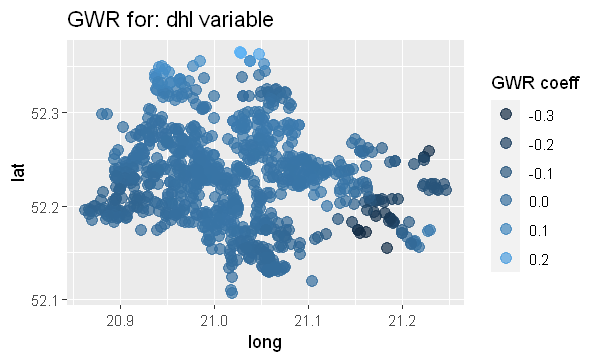

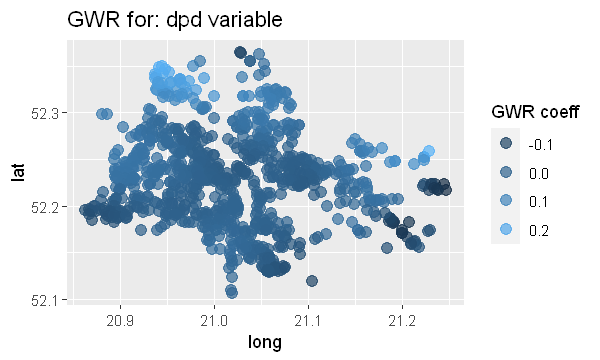

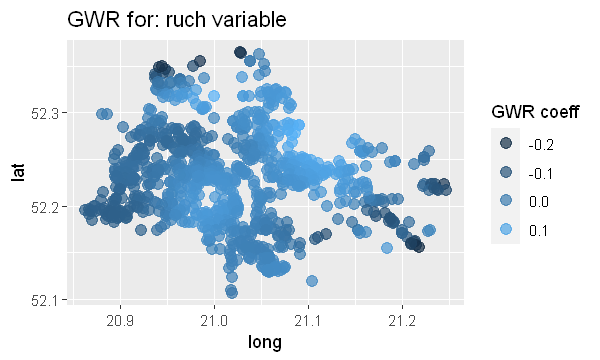

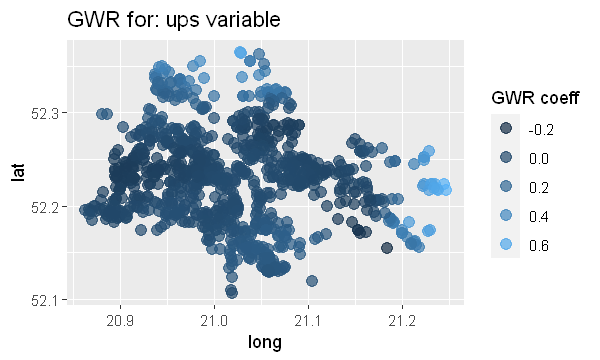

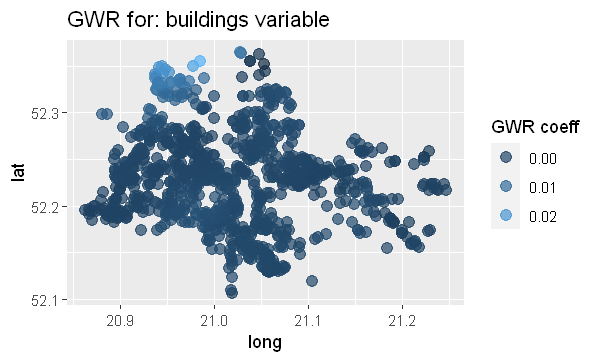

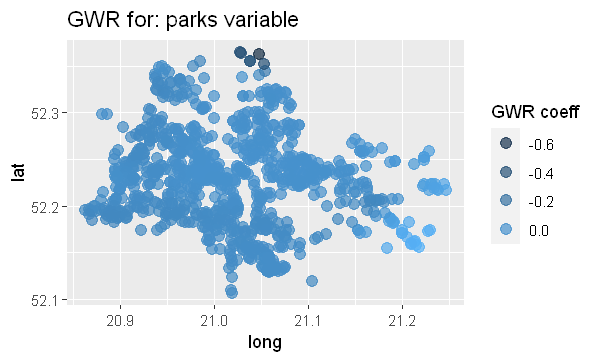

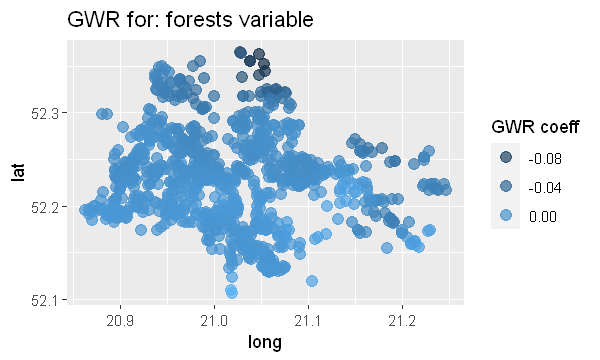

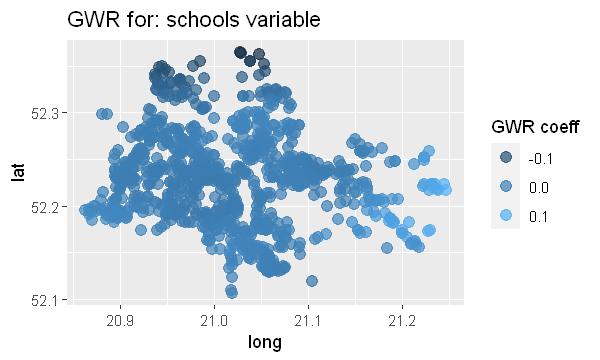

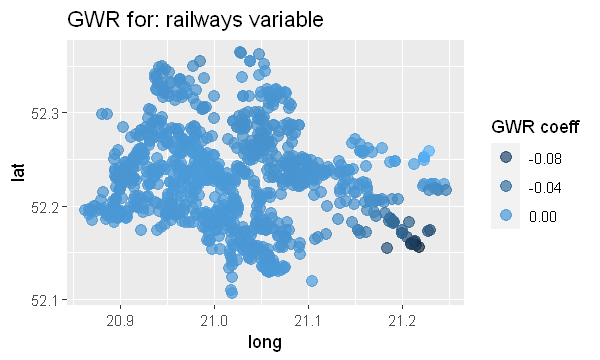

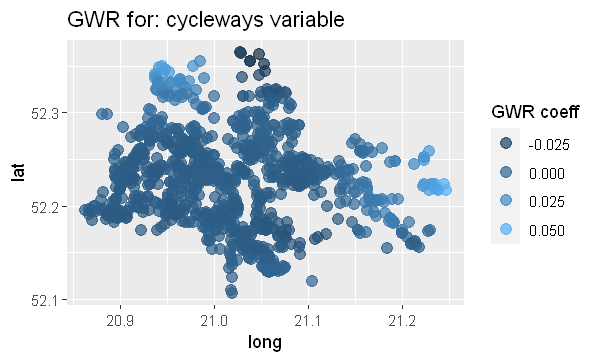

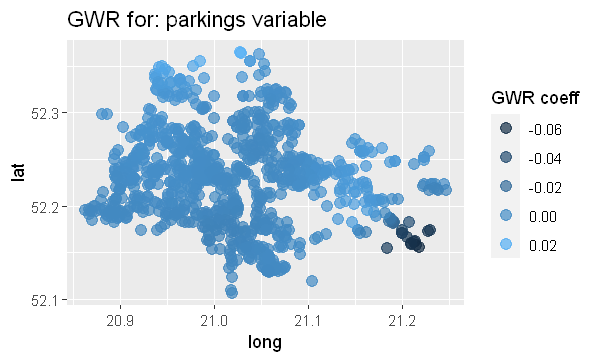

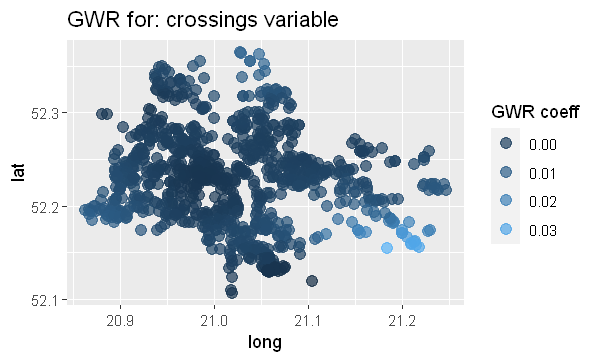

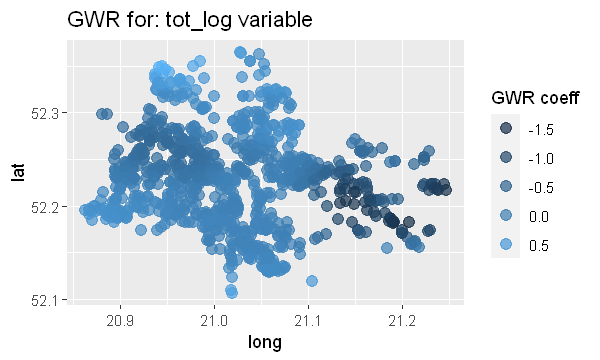

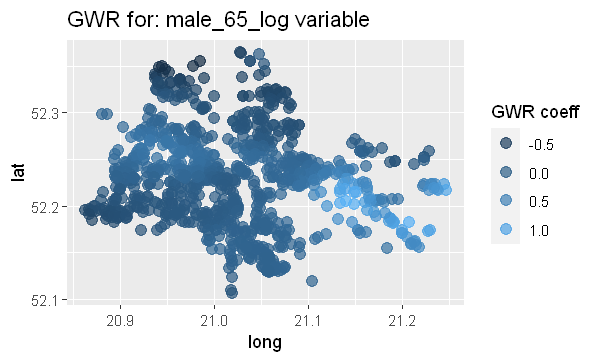

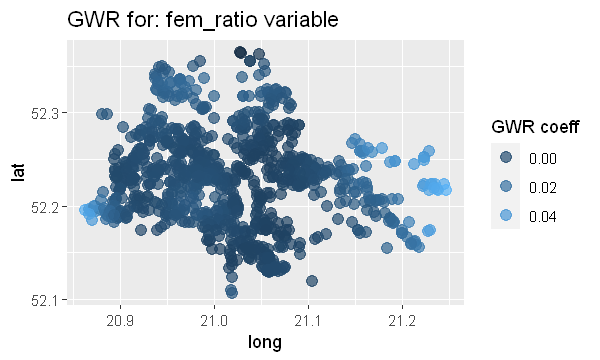

In [226]:
options(repr.plot.width=5, repr.plot.height=3)
layout(matrix(1:16, 1, 16))

for (i in features){
    g <- ggplot() + 
    geom_point(data = df_Warszawa, aes(long, lat, colour = model.ggwr_Warszawa$SDF[[i]]), size = 3, alpha = 0.7) +
    labs(title = paste("GWR for:", i, "variable")) +
    guides(colour =  guide_legend(title = "GWR coeff"))
    print(g)
}

Taking into account the above visualizations, it should be noted that spatial differences between different areas in Warsaw are imperceptible for most of the variables. In the case of the coefficients for the operators: for Poczta Polska, DHL, DPD and UPS, the coefficients are rather negative or zero, while for Ruch they are rather positive. Regarding points of interest, most of the coefficients hover around zero. In the case of demographic variables, there is a variable total population, for which the ratios are mostly positive, while for the population of men over 65, this variable has a negative ratio.

### Optimal number of clusters for Warszawa

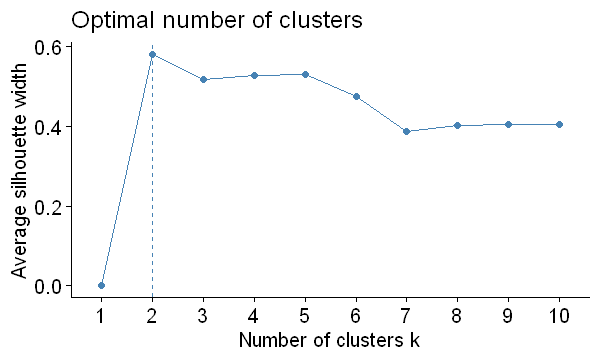

In [165]:
# clustering of GWR coefficients
fviz_nbclust(as.data.frame(model.ggwr_Warszawa$SDF[,2:18]), FUNcluster=kmeans)

Despite the fact that the figure above shows the optimal number of 2 clusters, we decide to choose 5 clusters, due to the slightly lower average silhouette and more interesting analysis than for 2 clusters only.

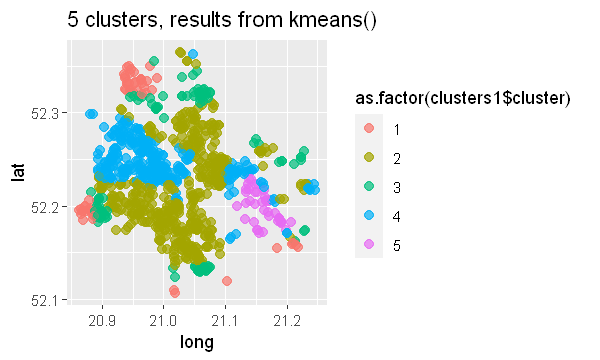

In [227]:
clusters1<-kmeans(as.data.frame(model.ggwr_Warszawa$SDF[,2:18]), 5) 

options(repr.plot.width=5, repr.plot.height=3)

ggplot(data=df_Warszawa, aes(long, lat)) + geom_point(aes(colour = as.factor(clusters1$cluster)), size = 2.5, alpha = 0.7) +
labs(title = '5 clusters, results from kmeans()')

In the figure above, we can see a clear division into 2 central clusters (second and fourth) and 3 smaller clusters on the outskirts of Warsaw (first, third and fifth cluster).

In [228]:
df_Warszawa$clust1<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust1[clusters1$cluster==1]<-1
df_Warszawa$clust2<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust2[clusters1$cluster==2]<-1
df_Warszawa$clust3<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust3[clusters1$cluster==3]<-1
df_Warszawa$clust4<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust4[clusters1$cluster==4]<-1
df_Warszawa$clust5<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust5[clusters1$cluster==5]<-1

### Equation for a-spatial linear model

In [174]:
eq1 <- inpost ~ poczta + dhl + dpd + ruch + ups + 
            buildings + parks + forests + schools + railways + cycleways + parkings + crossings + 
            tot_log + male_65_log + fem_ratio +  clust1 + clust2 + clust3 + clust4

### a-spatial linear model with full specification

In [175]:
model.ols_Warszawa<-lm(eq1, data=df_Warszawa)
summary(model.ols_Warszawa)


Call:
lm(formula = eq1, data = df_Warszawa)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8505 -0.8267  0.6386  1.9559  6.9644 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.025931   2.162413  -1.862 0.062954 .  
poczta      -0.099337   0.075912  -1.309 0.191004    
dhl          0.114894   0.066974   1.715 0.086592 .  
dpd          0.021883   0.104635   0.209 0.834387    
ruch         0.334948   0.114142   2.934 0.003424 ** 
ups          0.243012   0.149803   1.622 0.105101    
buildings    0.003823   0.002598   1.472 0.141476    
parks       -0.073882   0.027474  -2.689 0.007293 ** 
forests      0.007963   0.016308   0.488 0.625463    
schools      0.031139   0.026383   1.180 0.238193    
railways    -0.005929   0.006201  -0.956 0.339274    
cycleways   -0.031289   0.009675  -3.234 0.001265 ** 
parkings    -0.002102   0.005276  -0.398 0.690397    
crossings    0.004946   0.004705   1.051 0.293453    
tot_log      1.429668   0.388484   3

### 2nd equation for a-spatial linear model without insignificant variables (except clusters dummies)

Due to the large number of insignificant variables, we eliminated these variables (except clusters dummies).

In [229]:
eq2 <- inpost ~ ruch + ups + 
            parks + cycleways + 
            tot_log +  clust1 + clust2 + clust3 + clust4

### Final a-spatial linear model

In [230]:
model.ols_Warszawa2<-lm(eq2, data=df_Warszawa)
summary(model.ols_Warszawa2)


Call:
lm(formula = eq2, data = df_Warszawa)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9776 -0.7694  0.6371  1.9826  6.9376 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.65204    1.15406  -2.298 0.021783 *  
ruch         0.36906    0.10048   3.673 0.000253 ***
ups          0.27289    0.14284   1.911 0.056373 .  
parks       -0.05472    0.02409  -2.272 0.023323 *  
cycleways   -0.02125    0.00789  -2.693 0.007208 ** 
tot_log      1.34984    0.14648   9.215  < 2e-16 ***
clust1      -0.14462    0.68946  -0.210 0.833906    
clust2       0.21906    0.57300   0.382 0.702326    
clust3       0.23150    0.62060   0.373 0.709215    
clust4      -0.10192    0.60157  -0.169 0.865504    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.287 on 928 degrees of freedom
Multiple R-squared:  0.1826,	Adjusted R-squared:  0.1746 
F-statistic: 23.03 on 9 and 928 DF,  p-value: < 2.2e-16


Adjusted R2 for "Warszawa model" is equal to 17.5%. It is relatively low value. The reason for that could be probably irregular location of Inpost parcels machines in Warszawa. Regarding this model it is important that all variables are jointly significant. Analyzing the coefficients, it should be noted, that all coefficients for clusters dummies are insignificant - in this case division to the clusters is not needed (homogeneity in Warsaw). In the case of positive significant coefficients: the more Ruch and UPS points and the higher the total population, the more Inpost points. Considering negative significant variables: more parks and cycleways cause the lower number of Inpost points.

## Analysis for Kraków

In [231]:
df_points_Krakow<-readOGR(".", "df_krakow")

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Michal_schudnij\Desktop\Spatial_eco\repo\codes", layer: "df_krakow"
with 388 features
It has 49 fields
Integer64 fields read as strings:  inpost_poi 


In [232]:
crds<-coordinates(df_points_Krakow)

In [233]:
names(df_points_Krakow)[3] <- 'inpost'
names(df_points_Krakow)[4] <- 'poczta'
names(df_points_Krakow)[5] <- 'dhl'
names(df_points_Krakow)[6] <- 'ruch'
names(df_points_Krakow)[7] <- 'dpd'
names(df_points_Krakow)[8] <- 'ups'
names(df_points_Krakow)[22] <- 'fem_ratio'
names(df_points_Krakow)[36] <- 'tot_log'
names(df_points_Krakow)[44] <- 'male_65_log'

In [234]:
df_Krakow <- as.data.frame(df_points_Krakow)
df_Krakow$inpost <- as.numeric(df_Krakow$inpost)

### Basic plot for all Inpost points in Kraków

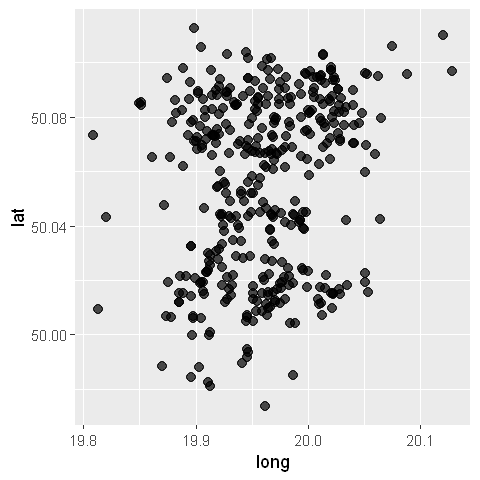

In [235]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot() + geom_point(data=df_Krakow, aes(long, lat), size = 2.5, alpha = 0.7)

### Model equation for GWR

The same set of variables as for Warszawa

In [236]:
# equation
eq <- inpost ~ poczta + dhl + dpd + ruch + ups + 
            buildings + parks + forests + schools + railways + cycleways + parkings + crossings + 
            tot_log + male_65_log + fem_ratio

### Selection of optimum bandwith
Commented out due to the time of execution. 

In [184]:
# # optimum bandwidth
# bw_Krakow <- ggwr.sel(eq, data=df_Krakow, coords=crds, family=poisson(), longlat=TRUE)

Bandwidth: 10.5784 CV score: 753.5725 
Bandwidth: 17.09913 CV score: 763.6016 
Bandwidth: 6.548374 CV score: 729.3078 
Bandwidth: 4.057679 CV score: 675.5492 
Bandwidth: 2.518345 CV score: 612.6373 
Bandwidth: 1.566984 CV score: 590.8475 
Bandwidth: 0.45501 CV score: 1505370 
Bandwidth: 1.142248 CV score: 603.5507 
Bandwidth: 1.744269 CV score: 594.3376 
Bandwidth: 1.53614 CV score: 590.1974 
Bandwidth: 1.385687 CV score: 588.8676 
Bandwidth: 1.395428 CV score: 588.7994 
Bandwidth: 1.421648 CV score: 588.744 
Bandwidth: 1.465381 CV score: 589.0258 
Bandwidth: 1.41632 CV score: 588.7406 
Bandwidth: 1.416594 CV score: 588.7406 
Bandwidth: 1.416531 CV score: 588.7406 
Bandwidth: 1.41649 CV score: 588.7406 
Bandwidth: 1.416531 CV score: 588.7406 


In [237]:
bw_Krakow = 1.41653116071638

### GWR model

In [238]:
model.ggwr_Krakow<-ggwr(eq, data=df_Krakow, coords=crds, family=poisson(), longlat=TRUE, bandwidth=bw_Krakow)
model.ggwr_Krakow

Call:
ggwr(formula = eq, data = df_Krakow, coords = crds, bandwidth = bw_Krakow, 
    family = poisson(), longlat = TRUE)
Kernel function: gwr.Gauss 
Fixed bandwidth: 1.416531 
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept. -1.1424e+01 -5.6233e+00 -3.4161e+00 -1.7161e-01  6.2185e+00
poczta       -4.7856e-01 -7.3706e-02 -2.1077e-02  7.2386e-03  1.2552e-01
dhl          -1.7738e-01 -3.3733e-03  2.9753e-02  5.9415e-02  6.8386e-01
dpd          -7.4700e-01 -1.1104e-01 -5.4823e-02  8.1547e-02  6.0352e-01
ruch         -2.6993e-01 -2.1470e-02  1.3083e-01  1.9562e-01  5.3755e-01
ups          -9.2996e-01  3.2486e-03  6.5286e-02  1.2378e-01  4.8286e-01
buildings    -1.8572e-02 -1.9911e-03 -7.2061e-04  8.4901e-05  2.0226e-02
parks        -2.1300e-01 -1.1900e-01 -8.5388e-02 -5.5236e-02  2.1936e-01
forests      -7.4076e-02 -2.1885e-02 -9.6270e-03 -1.9117e-03  5.3955e-02
schools      -7.9674e-02 -2.3819e-02 -5.

In [159]:
features <- c('poczta', 'dhl', 'dpd', 'ruch', 'ups', 'buildings', 'parks', 
    'forests', 'schools', 'railways', 'cycleways', 'parkings', 'crossings', 
    'tot_log', 'male_65_log', 'fem_ratio')

### Visualisation of GWR output for Kraków

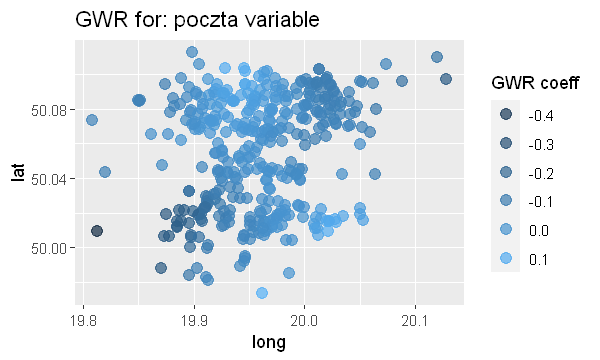

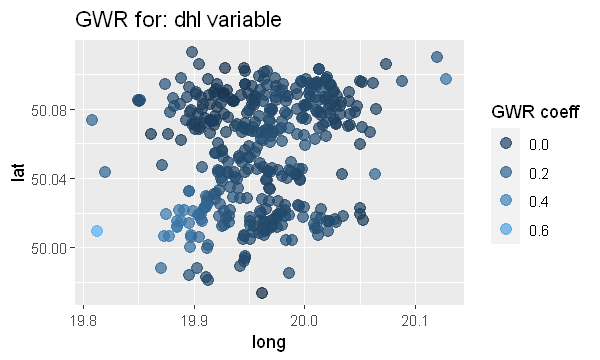

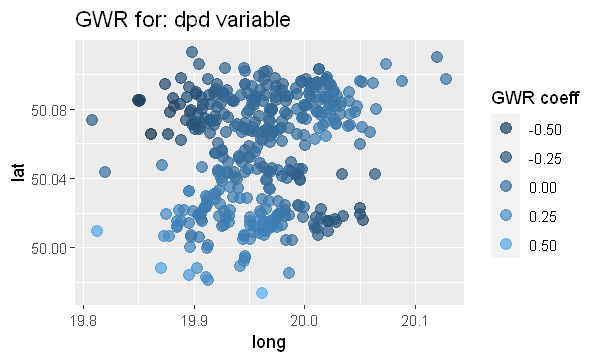

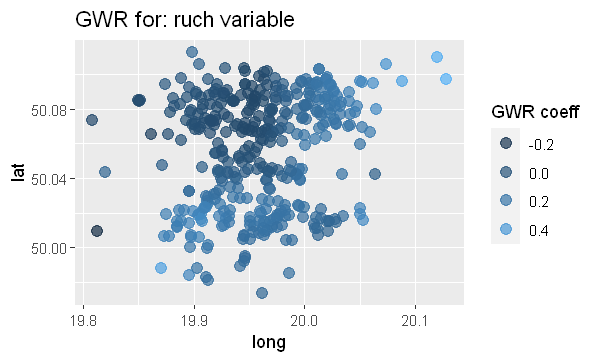

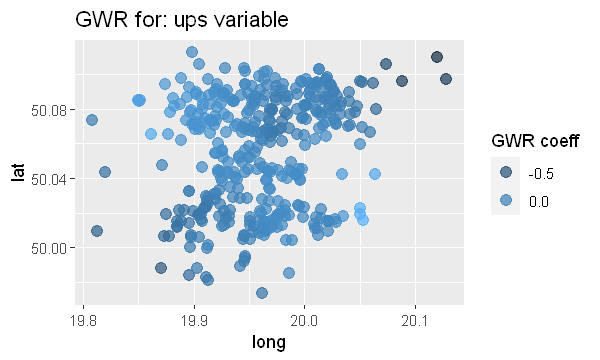

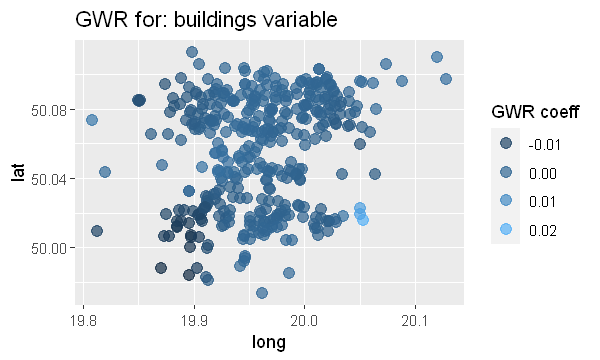

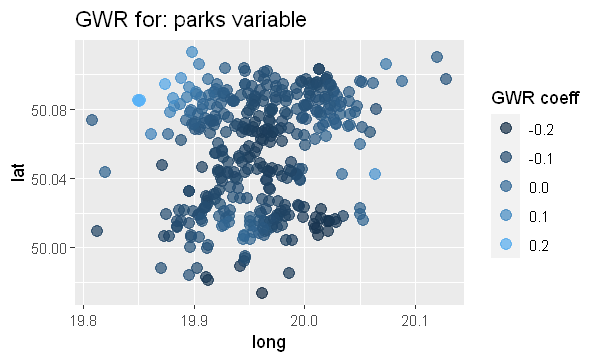

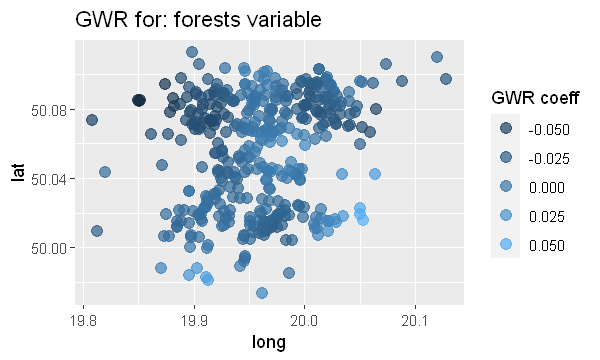

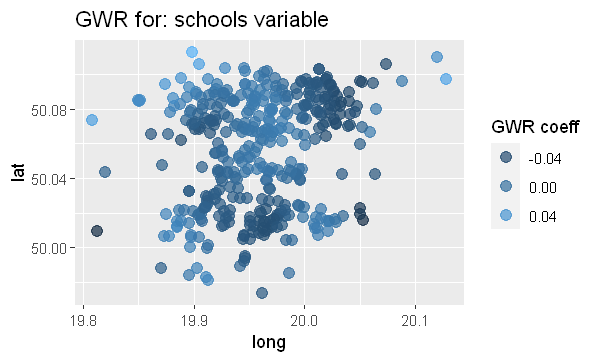

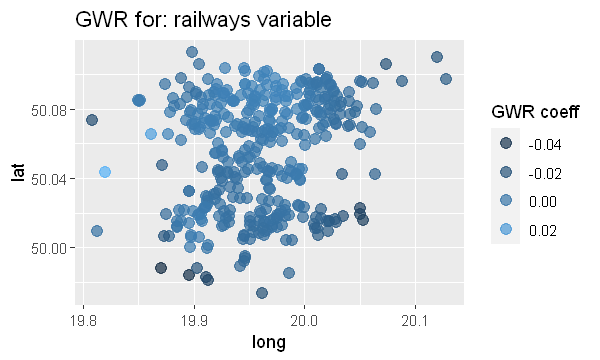

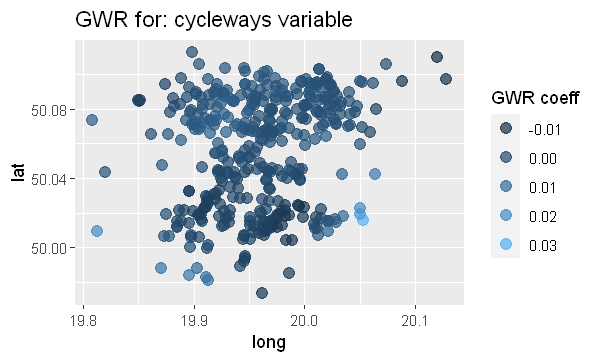

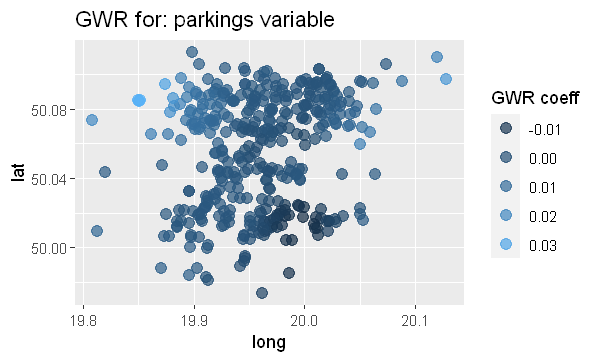

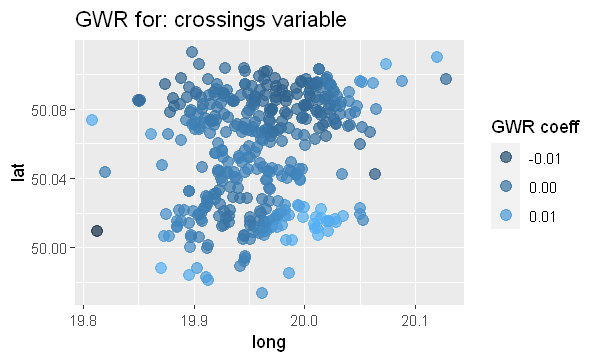

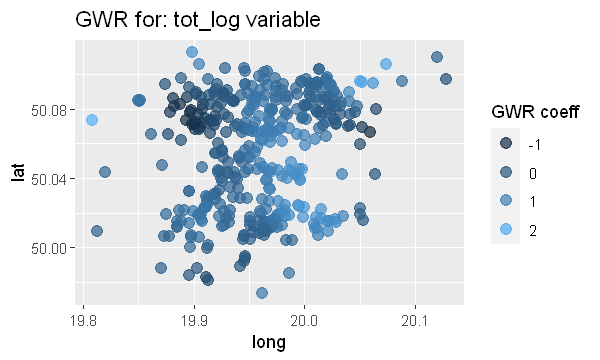

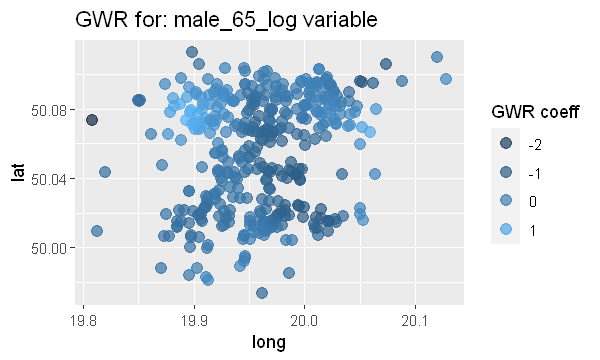

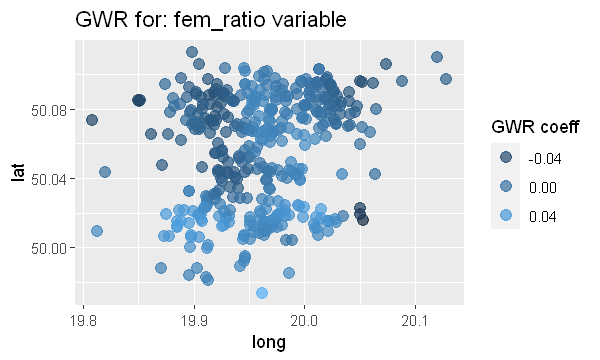

In [239]:
options(repr.plot.width=5, repr.plot.height=3)
layout(matrix(1:16, 1, 16))

for (i in features){

    
    g <- ggplot() + 
    geom_point(data = df_Krakow, aes(long, lat, colour = model.ggwr_Krakow$SDF[[i]]), size = 3, alpha = 0.7) +
    labs(title = paste("GWR for:", i, "variable")) +
    guides(colour =  guide_legend(title = "GWR coeff"))
    print(g)
}

Considering the above visualizations for Kraków, it should be noted that we have greater spatial variability between different areas than in Warszawa. In the case of coefficients for operators: most of the coefficients are around zero, however there are areas with positive or negative coefficients. Regarding points of interest, variables defining parks and forests are mostly negative, for the rest points of interest coefficients are around zero. In the case of demographic variables, again, as in the case of Warsaw, for total population, the coefficients are mostly positive (however with some 'negative' areas), while for the population of men over 65, this variable has a positive value for relatively many points.

### Optimal number of clusters for Kraków

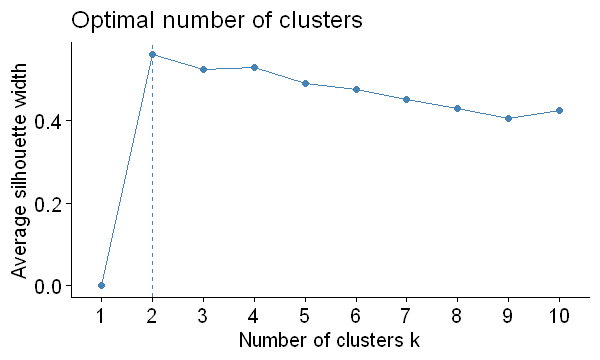

In [240]:
# clustering of GWR coefficients
fviz_nbclust(as.data.frame(model.ggwr_Krakow$SDF[,2:18]), FUNcluster=kmeans)

Despite the fact that the figure above shows the optimal number of 2 clusters, we decide to choose 4 clusters, due to the slightly lower average silhouette and more interesting analysis than for 2 clusters only.

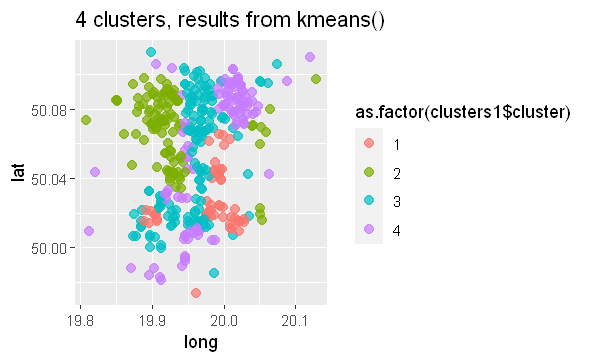

In [241]:
clusters1<-kmeans(as.data.frame(model.ggwr_Krakow$SDF[,2:18]), 4) 

options(repr.plot.width=5, repr.plot.height=3)

ggplot(data=df_Krakow, aes(long, lat)) + geom_point(aes(colour = as.factor(clusters1$cluster)), size = 2.5, alpha = 0.7) +
labs(title = '4 clusters, results from kmeans()')

In the figure above, we can see a division into 2 main vertical clusters (second and third) and 2 smaller clusters (first and fourth cluster) located on the outskirts of Krakow.

In [243]:
df_Krakow$clust1<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust1[clusters1$cluster==1]<-1
df_Krakow$clust2<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust2[clusters1$cluster==2]<-1
df_Krakow$clust3<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust3[clusters1$cluster==3]<-1
df_Krakow$clust4<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust4[clusters1$cluster==4]<-1

### Equation for a-spatial linear model

In [192]:
eq1 <- inpost ~ poczta + dhl + dpd + ruch + ups + 
            buildings + parks + forests + schools + railways + cycleways + parkings + crossings + 
            tot_log + male_65_log + fem_ratio + clust1 + clust2 + clust3

### a-spatial linear model with full specification

In [193]:
model.ols_Krakow<-lm(eq1, data=df_Krakow)
summary(model.ols_Krakow)


Call:
lm(formula = eq1, data = df_Krakow)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7373 -0.9511 -0.1385  0.8100  3.5824 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.3110028  1.7920716  -1.848 0.065465 .  
poczta      -0.0339122  0.0618983  -0.548 0.584114    
dhl          0.0734430  0.0655283   1.121 0.263111    
dpd         -0.0428689  0.1079344  -0.397 0.691468    
ruch         0.3984424  0.0977392   4.077 5.60e-05 ***
ups          0.3714112  0.1069046   3.474 0.000573 ***
buildings   -0.0004254  0.0015899  -0.268 0.789163    
parks       -0.2763362  0.0501453  -5.511 6.73e-08 ***
forests     -0.0243780  0.0137741  -1.770 0.077581 .  
schools     -0.0580050  0.0242127  -2.396 0.017090 *  
railways    -0.0028033  0.0048236  -0.581 0.561477    
cycleways    0.0096260  0.0040053   2.403 0.016743 *  
parkings     0.0085784  0.0033336   2.573 0.010463 *  
crossings    0.0085397  0.0042668   2.001 0.046078 *  
tot_log      1.0011421 

### 2nd equation for a-spatial linear model without insignificant variables

Due to the quite large number of insignificant variables, we eliminated these variables.

In [194]:
eq2<-inpost ~ ruch + ups + 
            parks + forests + schools + cycleways + parkings + crossings + 
            tot_log + clust1 + clust2 + clust3

### Final a-spatial linear model with 2nd specification

In [195]:
# a-spatial linear model
model.ols_Krakow2<-lm(eq2, data=df_Krakow)
summary(model.ols_Krakow2)


Call:
lm(formula = eq2, data = df_Krakow)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7190 -0.8983 -0.1202  0.7876  3.6214 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.818353   0.789262  -3.571 0.000402 ***
ruch         0.390744   0.091395   4.275 2.42e-05 ***
ups          0.395793   0.101731   3.891 0.000118 ***
parks       -0.264951   0.048524  -5.460 8.67e-08 ***
forests     -0.022671   0.013396  -1.692 0.091411 .  
schools     -0.068556   0.022153  -3.095 0.002118 ** 
cycleways    0.008730   0.003825   2.282 0.023044 *  
parkings     0.010665   0.002894   3.685 0.000262 ***
crossings    0.009355   0.003407   2.746 0.006330 ** 
tot_log      0.704860   0.103804   6.790 4.40e-11 ***
clust1       0.676982   0.244864   2.765 0.005978 ** 
clust2      -0.494152   0.205339  -2.407 0.016588 *  
clust3       0.067014   0.183911   0.364 0.715780    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

Adjusted R2 for "Kraków model" is equal to 41%. Comparing this result to model for Warszawa, we can say that distribution of Kraków Inpost machines is definitely more explainable than in Warszawa. Of course, all variables are also jointly significant. In contrast to Warszawa, clusters division for Kraków is definitely significant. The number of Inpost points is higher in cluster 1 (observations in the center of Kraków) than in cluster 4 (observations on the outskirts of Kraków), while the number of inpost points is lower in cluster 2 (points located on the north west of Kraków) than in cluster 4 (observations on the outskirts of Kraków). Estimate for cluster 3 (center of Kraków) is insignificant (no difference between third and fourth cluster). We can see definitely heterogeneity of this phenomenon in Kraków. Regarding other variables, absolutely more variables are significant than in the case of Warszawa. The greater number of Ruch and UPS points indicates a greater number of Inpost points. In the case of points of interest, we can see that the greater number of cycleways, parkings and crossings also increases the number of Inpost points, while the number of green areas (parks and forests) and schools reduces the number of Inpost points. Finally, the only demographic variable that is significant is total population. As expected, the more people, the larger the dependent variable.

### Comparison of models and conclusions

In [248]:
stargazer(model.ols_Warszawa, model.ols_Warszawa2, model.ols_Krakow, model.ols_Krakow2, type = 'text')


                                                           Dependent variable:                                        
                    --------------------------------------------------------------------------------------------------
                                                                  inpost                                              
                              (1)                      (2)                     (3)                      (4)           
----------------------------------------------------------------------------------------------------------------------
poczta                       -0.099                                           -0.034                                  
                            (0.076)                                          (0.062)                                  
                                                                                                                      
dhl                          0.115*            

Comparing the results obtained for Warszawa and Kraków, we can see that the adjusted R2 is definitely higher for Kraków than for Warszawa. It should be also noted that Inpost comes from Kraków - more regular and more logical arrangement of machines. Division into clusters is definitely more appropriate for modeling for Kraków. What is really intersting, considering significant variables, more of them have the same impact for both cities (positive impact of number of Ruch and UPS points on number of Inpost points). As expected, total population - more inpost points and in turn, negative impact of parks (green areas) on number of inpost points. 

When answering the hypotheses, it should be stated that all of them are positively considered. Inpost has parcel machines arranged in accordance with the competition (primarily Ruch and UPS). Control variables have a significant impact on the number of Inpost parcel machines. The use of GWR led to the verification of the above hypotheses and to the conclusion that spatial drift turned out to be significant.